In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path

In [104]:
# Hier euren Pfad zur CSV einfügen
path = "C:/Users/lorga/Desktop/Parlament/data/output.csv"
meps_df = pd.read_csv(path, sep = ";")

In [88]:
meps_df.head()

,identifier,name,familyName,givenName,country,group,gender,citizenship,memberships,born_place,born_day,born_month,born_year,disability,relatives,educated_at,degrees,occupation,born_region
0,96833,jens geier,Geier,Jens,DE,S&D,MALE,DEU,"ITRE,D-JP,BUDG,D-US",Frankfurt,22.0,6.0,1961.0,NaN,NaN,"Helmholtz-Gymnasium (Essen, Germany),Ruhr Univ...",other,"marketeer,official,politician,researcher,manag...",native
1,99945,lena düpont,Düpont,Lena,DE,PPE,FEMALE,DEU,"LIBE,D-ME,AGRI,FEMM,D-JP",Dortmund,30.0,4.0,1986.0,NaN,NaN,NaN,university,"manager,politician,journalist",native
2,204333,salvatore de meo,De Meo,Salvatore,IT,PPE,MALE,ITA,"AFCO,AGRI,D-RS,D-IN,ITRE,IMCO,D-RU",Fondi,27.0,10.0,1971.0,NaN,NaN,Sapienza University of Rome,"secondary,university","manager,other,politician,lawyer",native
3,124739,carlos zorrinho,Zorrinho,Carlos,PT,S&D,MALE,PRT,"DACP,ITRE,DAFR,DEVE,DMAS",Óbidos,28.0,5.0,1959.0,NaN,NaN,University of Évora,"phd,university","professor,official,politician",other
4,97236,marie toussaint,Toussaint,Marie,FR,Verts/ALE,FEMALE,FRA,"ITRE,JURI,D-US,DLAT,ENVI",LILLE,27.0,5.0,1987.0,NaN,NaN,Sciences Po,NaN,"other,politician,activist",native


In [89]:
org_list = []
for list_entry in meps_df["memberships"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            org_list.append(entry)
list(set(org_list))
org_list.remove("nan")
org_list[:5]

['ITRE', 'D-JP', 'BUDG', 'D-US', 'LIBE']

In [105]:
occupation_list = []
for list_entry in meps_df["occupation"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            occupation_list.append(entry)
occupation_list = list(set(occupation_list))
occupation_list.remove("nan")
occupation_list[:10]

['entrepreneur',
 'esperantist',
 'q63755179',
 'theologian',
 'cook',
 'lawyer',
 'bank officer',
 'communications adviser',
 'civil rights advocate',
 'collector']

In [106]:
degree_list = []
for list_entry in meps_df["degrees"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            degree_list.append(entry)
degree_list = list(set(degree_list))
degree_list.remove("nan")
degree_list[:50]

['university', 'phd', 'secondary', 'vocational']

In [92]:
educated_at_list = []
for list_entry in meps_df["educated_at"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            educated_at_list.append(entry)
educated_at_list = list(set(educated_at_list))
educated_at_list.remove("nan")
educated_at_list[:5]

['Kaunas University of Technology',
 'University of Paris 1 Pantheon-Sorbonne',
 'Masaryk University Faculty of Economics and Administration',
 'Gymnasium am Rotenbühl',
 'Petőfi Sándor Gimnázium']

## Gender

In [16]:
def filter_women_perc_df(column, column_entries, meps_df):
    gender_dict = {}
    non_na_df = meps_df.loc[meps_df[column].notna()]
    for column_entry in column_entries:
        filter_df = non_na_df.loc[non_na_df[column].str.contains(column_entry)]
        female_count = len(filter_df.loc[filter_df["gender"] == "FEMALE"].index)
        if len(filter_df.index > 0):
            female_percentage = female_count / len(filter_df.index) * 100
            gender_dict[column_entry] = female_percentage
    filter_percentage_df = pd.DataFrame.from_dict([gender_dict]).transpose()
    filter_percentage_df = filter_percentage_df.rename(columns = {0: "Percentage of women"})
    return filter_percentage_df.sort_values("Percentage of women")

In [13]:
gender_percentages_df = pd.DataFrame(meps_df.value_counts("gender"))
gender_percentages_df = gender_percentages_df.reset_index().rename(columns = {0: "count"})
gender_percentages_df["percentage"] = gender_percentages_df["count"] / gender_percentages_df["count"].sum()
gender_percentages_df

,gender,count,percentage
0,MALE,427,0.595537
1,FEMALE,290,0.404463


In [21]:
group_list = list(set(meps_df["group"].tolist()))
group_women_perc_df = filter_women_perc_df("group", group_list, meps_df)
group_women_perc_df.sort_values("Percentage of women")

,Percentage of women
ECR,27.536232
ID,37.288136
PPE,37.988827
NI,41.071429
Renew,42.156863
S&D,42.253521
Verts/ALE,48.611111
The Left,52.631579


In [100]:
country_list = list(set(meps_df["country"].tolist()))
country_women_perc_df = filter_women_perc_df("country", country_list, meps_df)
country_women_perc_df.sort_values("Percentage of women")[:10]
#country_women_perc_df = country_women_perc_df.reset_index().rename(columns = {"index": "country"})
#country_women_perc_df.to_csv("gender_country.csv", index = False)

,Percentage of women
RO,15.151515
CY,16.666667
GR,23.809524
SK,26.666667
LT,27.272727
EE,28.571429
BG,29.411765
HR,33.333333
MT,33.333333
PL,33.962264


In [101]:
committee_list = [org for org in org_list if not "D-" in org]
committee_percentage_df = filter_women_perc_df("memberships", committee_list, meps_df)
committee_percentage_df.sort_values("Percentage of women")[:10]

,Percentage of women
AFCO,19.642857
DARP,20.000000
DSEE,25.000000
BUDG,27.272727
DCAS,27.272727
SEDE,27.586207
ECON,30.769231
FISC,30.769231
AFET,31.481481
DNAT,31.578947


## Ethnicity / origin

Where were MEPs born?

In [22]:
meps_df["born_region"].value_counts()

native            596
other              51
not recognised     40
eu                 15
Name: born_region, dtype: int64

In [132]:
meps_df.groupby("country")["born_region"].value_counts()

country  born_region   
AT       native            16
         eu                 1
BE       native            19
         not recognised     1
         other              1
                           ..
SE       not recognised     5
         other              3
SI       native             8
SK       native            14
         not recognised     1
Name: born_region, Length: 72, dtype: int64

Which German MEPs where not born in Germany?

In [125]:
meps_df.loc[(meps_df["country"] == "DE") & (meps_df["born_region"] != "native")]

,identifier,name,familyName,givenName,country,group,gender,citizenship,memberships,born_place,born_day,born_month,born_year,disability,relatives,educated_at,degrees,occupation,born_region
212,197466,jutta paulus,Paulus,Jutta,DE,Verts/ALE,FEMALE,DEU,"ENVI,D-JP,ITRE,TRAN,D-AL,D-CA",Giessen,9.0,5.0,1967.0,NaN,NaN,"University of Marburg,Herderschule Gießen",NaN,politician,eu
242,197459,pierrette herzberger-fofana,Herzberger-Fofana,Pierrette,DE,Verts/ALE,FEMALE,DEU,"DEVE,DPAP,DACP,DAFR,DCAR,AFET,FEMM",Bamako,20.0,3.0,1949.0,NaN,NaN,"Trier University,University of Erlangen–Nuremberg",NaN,politician,other
296,96734,ska keller,Keller,Ska,DE,Verts/ALE,FEMALE,DEU,"ENVI,PECH,D-MX",W.-P.-St. Guben,22.0,11.0,1981.0,NaN,NaN,Free University Berlin,university,"politician,activist",other
317,28229,manfred weber,Weber,Manfred,DE,PPE,MALE,DEU,NaN,Niederhatzkofen,14.0,7.0,1972.0,NaN,NaN,Munich University of Applied Sciences,"university,secondary",politician,not recognised
442,197451,viola von cramon-taubadel,von Cramon-Taubadel,Viola,DE,Verts/ALE,FEMALE,DEU,"D-UA,AFET,D-RS,D-RU,DEPA,CONT,ITRE,CULT,D-JP,D-CN",Halle/Westfalen,23.0,3.0,1970.0,NaN,NaN,FernUniversität in Hagen,"university,secondary",politician,eu
577,251268,michael kauch,Kauch,Michael,DE,Renew,MALE,DEU,"ITRE,D-IL,AFET,ECON,DACP,DAFR",NaN,4.0,5.0,1967.0,NaN,NaN,NaN,NaN,marketeer,NaN
638,197460,sergey lagodinsky,Lagodinsky,Sergey,DE,Verts/ALE,MALE,DEU,"D-TR,JURI,DEPA,AFET,LIBE,DSCA,D-US",Astrakhan,1.0,12.0,1975.0,NaN,NaN,John F. Kennedy School of Government,"university,phd","politician,lawyer",other
640,197468,özlem demirel,Demirel,Özlem,DE,The Left,FEMALE,DEU,"SEDE,D-TR,EMPL,AFET",Malatya,10.0,3.0,1984.0,NaN,NaN,University of Bonn,NaN,politician,other


## Social background

What are the most common occupations?

In [108]:
occupation_dict = {}
for occupation in occupation_list:
    occupation_dict[occupation] = 0
notna_df = meps_df.loc[meps_df["occupation"].notna()]["occupation"]
for entry in notna_df.tolist():
    for occupation in occupation_list:
        if occupation in entry:
            occupation_dict[occupation] += 1
occupation_count_df = pd.DataFrame.from_dict(occupation_dict, orient = "index")
occupation_count_df = occupation_count_df.rename(columns = {0: "count"})
occupation_count_df = occupation_count_df.sort_values("count", ascending = False)
occupation_count_df["percentage"] = occupation_count_df["count"] / len(notna_df.index)
occupation_count_df[:10]

,count,percentage
politician,637,0.962236
manager,154,0.232628
lawyer,122,0.184290
researcher,105,0.158610
official,88,0.132931
professor,80,0.120846
journalist,68,0.102719
teacher,48,0.072508
consultant,31,0.046828
engineer,26,0.039275


In [109]:
degree_dict = {}
for degree in degree_list:
    degree_dict[degree] = 0
notna_df = meps_df.loc[meps_df["degrees"].notna()]["degrees"]
for entry in notna_df.tolist():
    for degree in degree_list:
        if degree in entry:
            degree_dict[degree] += 1
degree_count_df = pd.DataFrame.from_dict(degree_dict, orient = "index")
degree_count_df = degree_count_df.rename(columns = {0: "count"})
degree_count_df = degree_count_df.sort_values("count", ascending = False)
degree_count_df["percentage"] = degree_count_df["count"] / len(notna_df.index)
degree_count_df[:10]

,count,percentage
university,307,0.933131
phd,106,0.322188
secondary,53,0.161094
vocational,7,0.021277


Does degree and career composition change along group lines?

Where were MEPs educated?

In [111]:
educated_at_dict = {}
for educated_at in educated_at_list:
    educated_at_dict[educated_at] = 0
notna_df = meps_df.loc[meps_df["educated_at"].notna()]["educated_at"]
for entry in notna_df.tolist():
    for educated_at in educated_at_list:
        if educated_at in entry:
            educated_at_dict[educated_at] += 1
educated_at_df = pd.DataFrame.from_dict(educated_at_dict, orient = "index")
educated_at_df = educated_at_df.rename(columns = {0: "count"})
educated_at_df = educated_at_df.sort_values("count", ascending = False)
educated_at_df["percentage"] = educated_at_df["count"] / len(notna_df.index)
educated_at_df[:10]

,count,percentage
Sciences Po,16,0.034409
Faculty of Law,13,0.027957
Eötvös Loránd University,11,0.023656
Vienna,9,0.019355
University of Vienna,8,0.017204
Complutense University of Madrid,7,0.015054
University of Latvia,7,0.015054
University of Tartu,7,0.015054
University of Bologna,7,0.015054
National and Kapodistrian University of Athens,7,0.015054


## Age

When were MEPs born?

In [27]:
meps_birthyear_df = pd.DataFrame(meps_df["born_year"].value_counts())
meps_birthyear_df = meps_birthyear_df.reset_index().rename(columns = {"index": "year", "born_year": "count"})
meps_birthyear_df = meps_birthyear_df.sort_values(by = "year")
meps_birthyear_df = meps_birthyear_df.loc[meps_birthyear_df["year"] > 1900]
meps_birthyear_df.head()

,year,count
50,1940.0,1
44,1944.0,3
48,1945.0,2
49,1946.0,2
45,1947.0,3


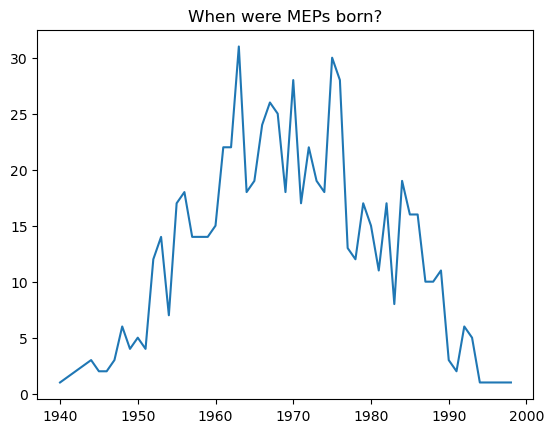

In [28]:
plt.plot(meps_birthyear_df["year"], meps_birthyear_df['count'])
plt.title("When were MEPs born?")
plt.show()

How do committees vary in median age?

In [36]:
def get_median_age(column, filter_list, meps_df):
    df = meps_df.loc[meps_df[column].notna()]
    df = df.loc[meps_df["born_year"] != 0]
    median_age_dict = {}
    for filter_entry in filter_list:
        filter_df = df.loc[df[column].str.contains(filter_entry)]
        birth_dates = filter_df["born_year"].tolist()
        ages = [(2023 - birth_date) for birth_date in birth_dates]
        median_age = sum(ages) / len(ages)
        median_age_dict[filter_entry] = median_age
    median_age_df = pd.DataFrame.from_dict(median_age_dict, orient = "index")
    median_age_df = median_age_df.reset_index().rename(columns = {"index": "org", 0: "median_age"})
    return median_age_df

In [39]:
committee_list = [org for org in org_list if not "D-" in org]
committee_list = [committee for committee in committee_list if committee != "nan"]
committee_median_age_df = get_median_age("memberships", committee_list, meps_df)
committee_median_age_df = committee_median_age_df.rename(columns = {"org": "committee"})
committee_median_age_df.head()

,committee,median_age
0,PETI,51.523077
1,DEVE,57.632653
2,CONT,53.944444
3,DROI,54.245614
4,DARP,53.033333


In [40]:
committee_median_age_df.sort_values("median_age").head()

,committee,median_age
31,SANT,50.285714
22,EMPL,51.009615
10,LIBE,51.410448
0,PETI,51.523077
14,IMCO,51.880952


In [41]:
committee_median_age_df.sort_values("median_age", ascending = False).head()

,committee,median_age
47,DNAT,57.947368
1,DEVE,57.632653
46,DPAC,57.437500
34,DEPA,55.911111
16,DAFR,55.632653


In [46]:
faction_list = set(meps_df["group"].tolist())
faction_median_age_df = get_median_age("group", faction_list, meps_df)
faction_median_age_df = faction_median_age_df.rename(columns = {"org": "faction"})
faction_median_age_df.sort_values("median_age")

,faction,median_age
7,Verts/ALE,48.816901
4,Renew,51.250000
3,The Left,51.333333
2,NI,52.686275
5,ID,53.775862
0,S&D,54.260563
1,PPE,54.977654
6,ECR,56.686567
